In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "NanumGothicCoding"
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
%matplotlib inline
import missingno as msno
from plotnine import *

In [2]:
shop_2018 = pd.read_csv("./data/shop_201806_01.csv", encoding = "euc-kr") # cp949
shop_2018

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499323,16141434,배스킨라빈스31,건대스타시티점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,1121510500102270007022407,더샵스타시티,서울특별시 광진구 아차산로 262,143730,5065.0,NaN,NaN,NaN,127.072944,37.536997
499324,16093390,본도시락,본설렁탕,Q,음식,Q01,한식,Q01A09,설렁탕집,I56111,...,1174010900105020000000001,강동타워,서울특별시 강동구 상일로6길 39,134100,5288.0,NaN,NaN,NaN,127.175331,37.549794
499325,16093078,체크페이먼트,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010600109050000028207,성아빌딩,서울특별시 강남구 역삼로69길 10,135841,6196.0,NaN,NaN,NaN,127.054001,37.502210
499326,16093122,마젠타네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1144010200104630000002585,마포현대하이엘,서울특별시 마포구 마포대로 173,121862,4130.0,NaN,1,NaN,126.954442,37.549892


In [3]:
# 소분류에 커피가 포함된 데이터만 추출한다.
coffee = shop_2018[shop_2018["상권업종소분류명"].str.contains("커피")]
coffee.shape

(20600, 39)

In [4]:
coffee["상호명"].unique().shape

(13718,)

In [5]:
coffee.loc[coffee["상호명"].str.contains("스타벅스"), "상호명"].unique()

array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스올림픽평화의문점', '스타벅스새문안로점', '스타벅스연신내역', '스타벅스연세백양로점',
       '스타벅스가락시장역점', '스타벅스외대점', '스타벅스석촌역', '스타벅스명지대점', '스타벅스압구정로데오역',
       '스타벅스연대동문', '스타벅스강남삼성타운점', '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스광장점',
       '스타벅스사당점', '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점',
       '스타벅스삼선교점', '스타벅스충정타워', '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스이수역점',
       '스타벅스방배카페입구', '스타벅스종각점', '스타벅스W-MALL점', '스타벅스용산역점', '스타벅스마포일진빌딩점',
       '스타벅스천호로데오점', '스타벅스중계역점', '스타벅스명동메트로', '스타벅스마포아크로타워점',
       '스타벅스남부터미널2점', '스타벅스구로디지털로점', '스타벅스중랑구청점', '스타벅스논현힐탑', '스타벅스종로관수점',
       '스타벅스부산서면', '스타벅스삼성도심공항점', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점',
       '스타벅스선릉로점', '스타벅스커피신도림디큐브시티B2', '스타벅스역삼럭키', '스타벅스이태원거리점',
       '스타벅스구로에이스트윈타워1점', '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점',
       '스타벅스삼성교점', '스타벅스남산스테이트', '스타벅스구로하이엔드점', '스타벅스명일이마트점',
       '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스커리학동사거리점', '스타벅스서울교대점',
       '스타벅스강북구청사거리점', '스타벅스청담사거리점', '스타

In [6]:
coffee["시도명"].isnull().sum()

0

In [7]:
coffee["시도명"].value_counts()

서울특별시    16088
부산광역시     4512
Name: 시도명, dtype: int64

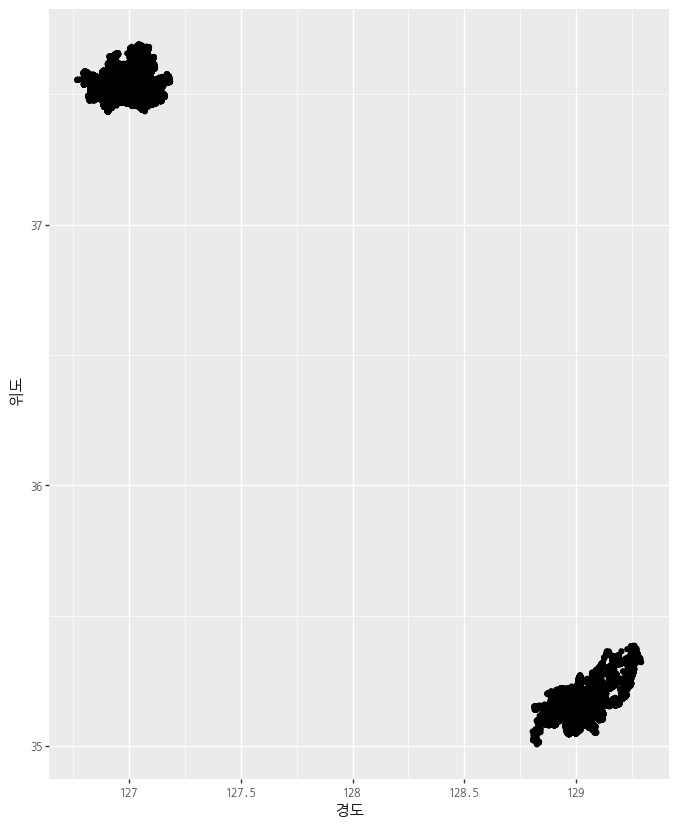

<ggplot: (-9223371889014398667)>

In [8]:
ggplot(shop_2018, aes(x = "경도", y = "위도")) + geom_point() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (8, 10))

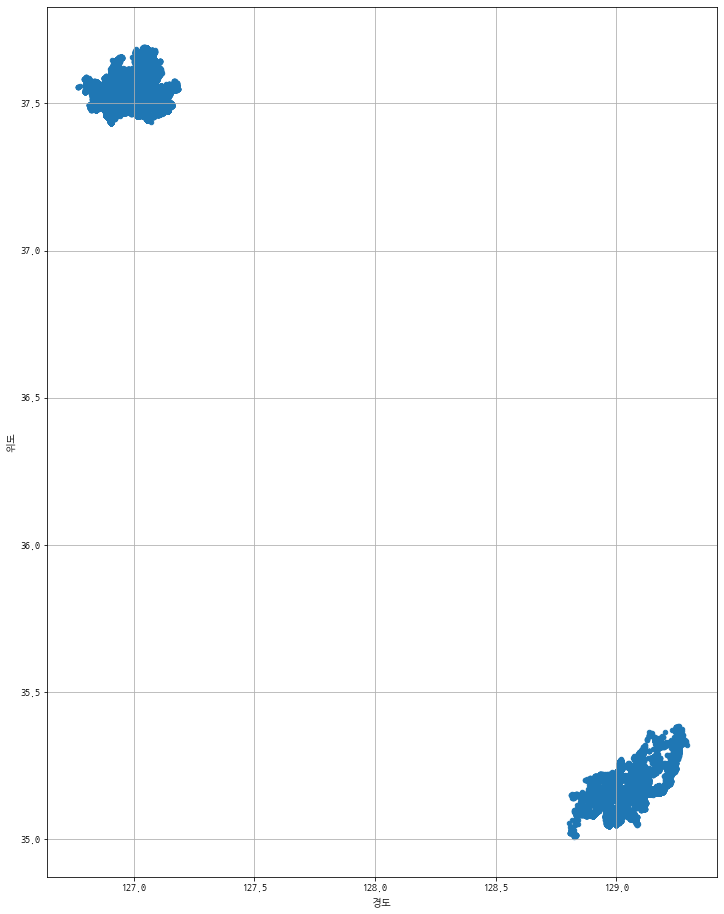

In [9]:
shop_2018.plot.scatter(x = "경도", y = "위도", grid = True, figsize = (12, 16))

In [10]:
df_seoul = shop_2018[shop_2018["시도명"].str.startswith("서울")]
df_seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249
5,19975850,허술한집,NaN,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,...,1150010800100450031005883,NaN,서울특별시 강서구 공항대로3길 9,157812,7619.0,NaN,1,NaN,126.809957,37.562013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499323,16141434,배스킨라빈스31,건대스타시티점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,1121510500102270007022407,더샵스타시티,서울특별시 광진구 아차산로 262,143730,5065.0,NaN,NaN,NaN,127.072944,37.536997
499324,16093390,본도시락,본설렁탕,Q,음식,Q01,한식,Q01A09,설렁탕집,I56111,...,1174010900105020000000001,강동타워,서울특별시 강동구 상일로6길 39,134100,5288.0,NaN,NaN,NaN,127.175331,37.549794
499325,16093078,체크페이먼트,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010600109050000028207,성아빌딩,서울특별시 강남구 역삼로69길 10,135841,6196.0,NaN,NaN,NaN,127.054001,37.502210
499326,16093122,마젠타네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1144010200104630000002585,마포현대하이엘,서울특별시 마포구 마포대로 173,121862,4130.0,NaN,1,NaN,126.954442,37.549892


In [11]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          295853
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      19973
표준산업분류명       19973
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         66950
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        303299
건물관리번호            0
건물명          180470
도로명주소             0
구우편번호             0
신우편번호             2
동정보          319409
층정보          102707
호정보          297152
경도                0
위도                0
dtype: int64

In [12]:
df_seoul["상권업종대분류명"].value_counts()

음식          112894
소매          106490
생활서비스        57266
학문/교육        27717
의료           15299
부동산          13164
관광/여가/오락      9536
숙박            2790
스포츠            112
Name: 상권업종대분류명, dtype: int64

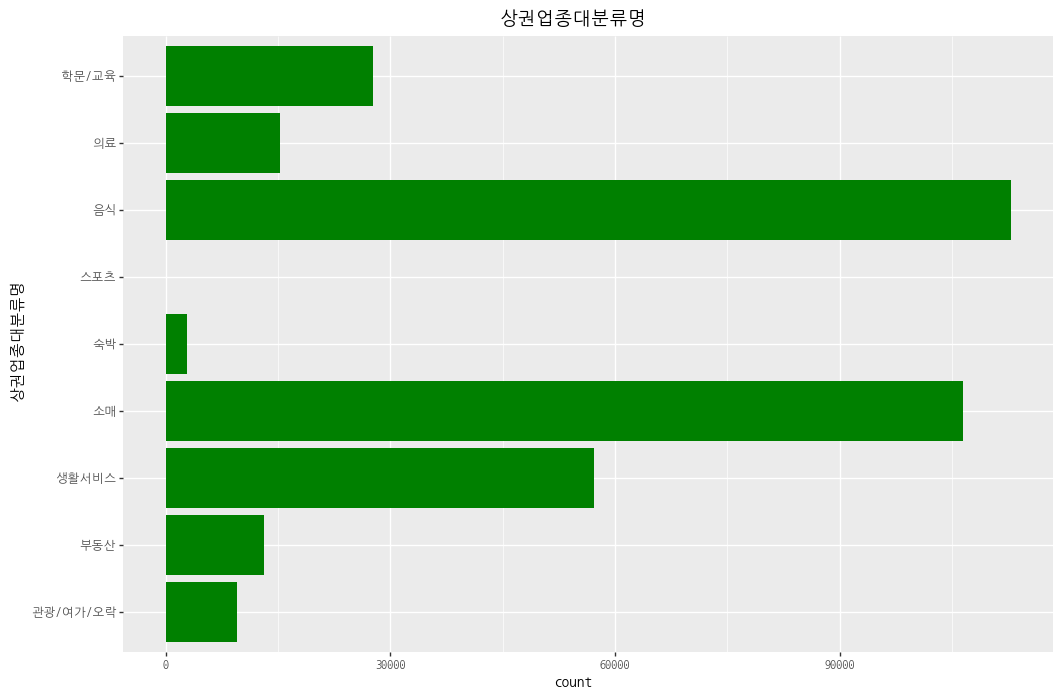

<ggplot: (-9223371889081039374)>

In [13]:
ggplot(df_seoul, aes(x = "상권업종대분류명")) + geom_bar(fill = "green") \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (12, 8)) \
    + coord_flip() \
    + ggtitle("상권업종대분류명")

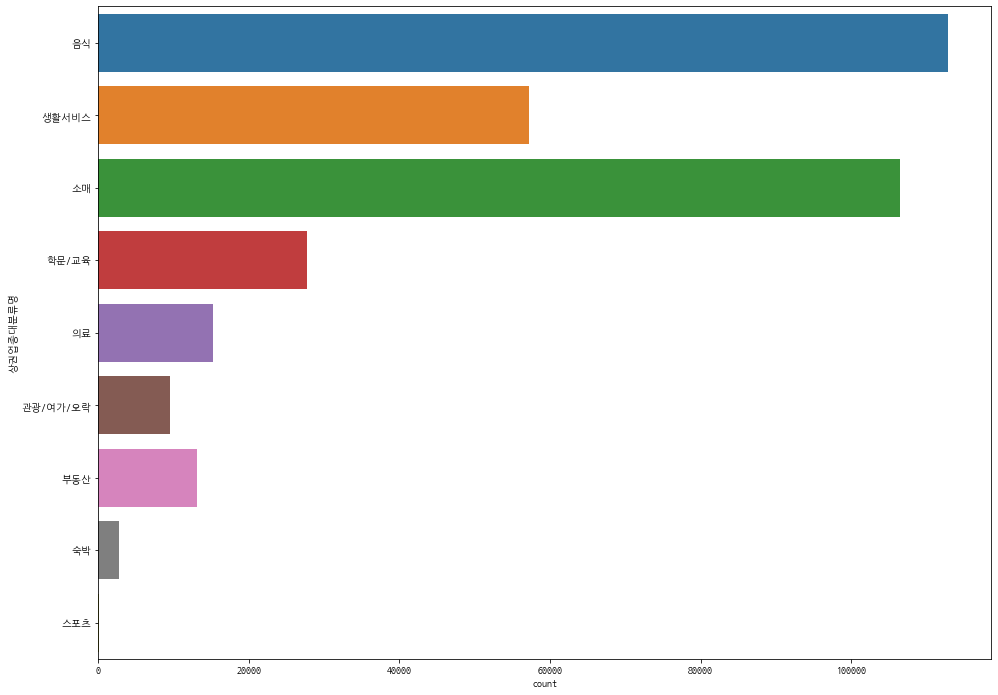

In [14]:
plt.figure(figsize = (16, 12))
sns.countplot(data = df_seoul, y = "상권업종대분류명")

상권업종대분류명 - 음식

In [15]:
df_food = df_seoul[df_seoul["상권업종대분류명"].str.contains("음식")]
df_food

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
5,19975850,허술한집,NaN,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,...,1150010800100450031005883,NaN,서울특별시 강서구 공항대로3길 9,157812,7619.0,NaN,1,NaN,126.809957,37.562013
6,19977290,피자마루,약수점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1114016200103720095000001,현진빌딩,서울특별시 중구 동호로7길 37,100450,4596.0,NaN,1,NaN,127.010861,37.552153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499320,16138463,스타벅스,독립문역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111018000100120001020675,경희궁자이4단지,서울특별시 종로구 송월길 155,110100,3165.0,NaN,20,NaN,126.961371,37.571632
499322,16141060,간단하지만특별한화피디Cafe,앤아더,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1120011400106680104027681,NaN,서울특별시 성동구 서울숲2길 40-10,133824,4768.0,NaN,NaN,NaN,127.042749,37.546316
499323,16141434,배스킨라빈스31,건대스타시티점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,1121510500102270007022407,더샵스타시티,서울특별시 광진구 아차산로 262,143730,5065.0,NaN,NaN,NaN,127.072944,37.536997
499324,16093390,본도시락,본설렁탕,Q,음식,Q01,한식,Q01A09,설렁탕집,I56111,...,1174010900105020000000001,강동타워,서울특별시 강동구 상일로6길 39,134100,5288.0,NaN,NaN,NaN,127.175331,37.549794


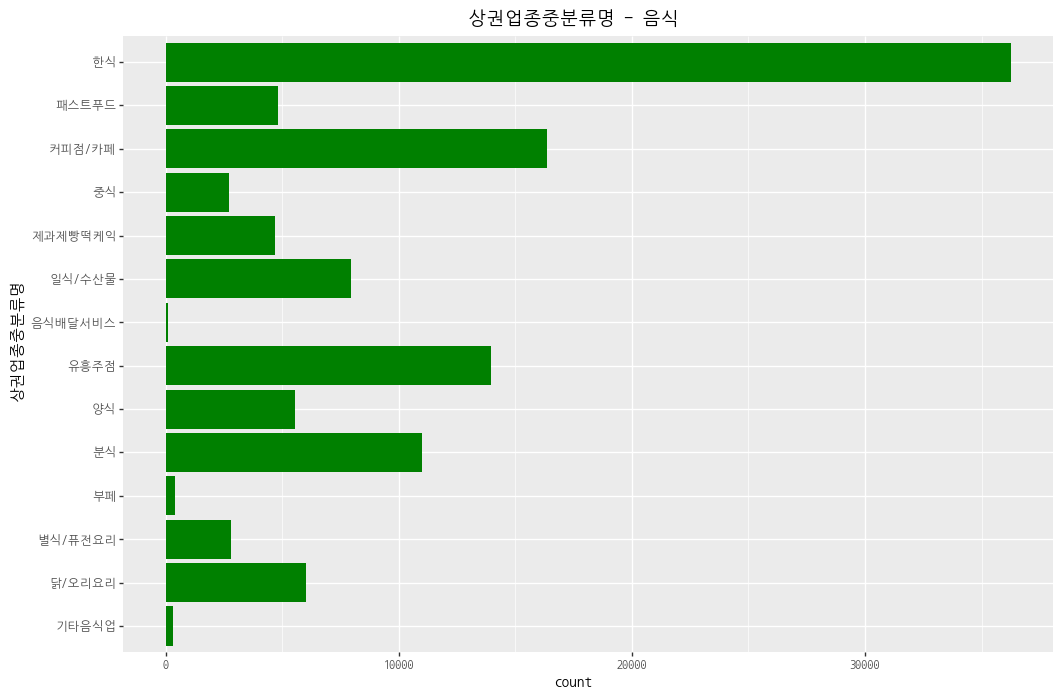

<ggplot: (-9223371889081046931)>

In [16]:
ggplot(df_food, aes(x = "상권업종중분류명")) + geom_bar(fill = "green") \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (12, 8)) \
    + coord_flip() \
    + ggtitle("상권업종중분류명 - 음식")

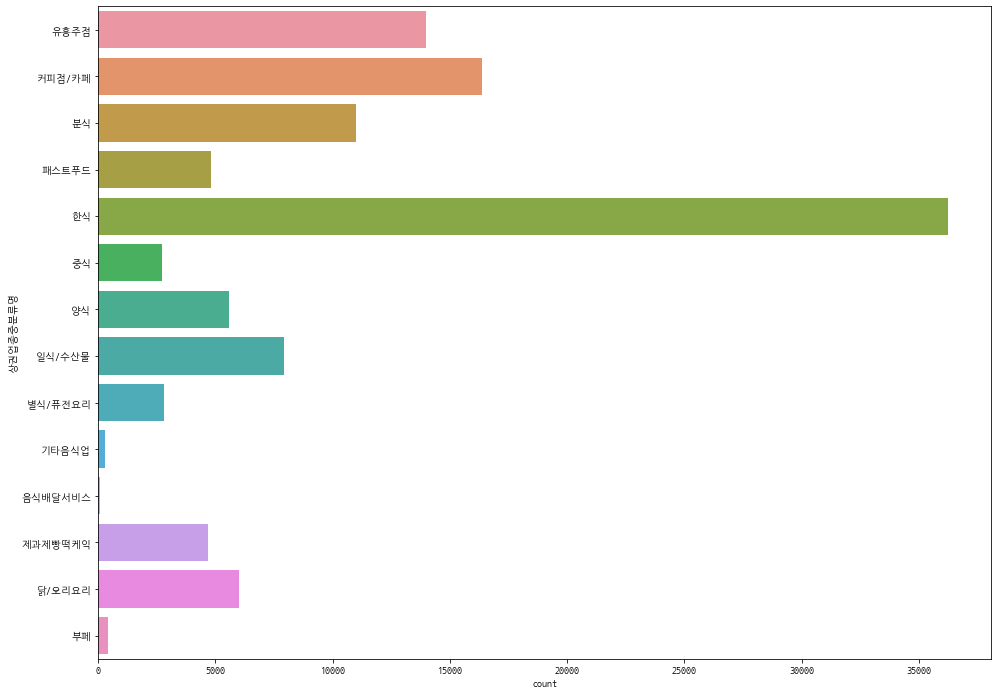

In [17]:
plt.figure(figsize = (16, 12))
sns.countplot(data = df_food, y = "상권업종중분류명")

In [18]:
# 상권업종중분류명이 패스트푸드인 데이터만 추출한다.
df_fast_food = df_food.loc[df_food["상권업종중분류명"] == "패스트푸드"]
df_fast_food

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
6,19977290,피자마루,약수점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1114016200103720095000001,현진빌딩,서울특별시 중구 동호로7길 37,100450,4596.0,NaN,1,NaN,127.010861,37.552153
37,20107897,롯데리아,신림역점,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,I56199,...,1162010200116400009021089,NaN,서울특별시 관악구 남부순환로 1610,151930,8776.0,NaN,2,NaN,126.929288,37.483899
56,20581495,메가박스상봉,NaN,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,I56199,...,1126010200101300169000001,안산빌딩,서울특별시 중랑구 망우로30길 3,131220,2120.0,NaN,4,NaN,127.074729,37.593074
60,20687182,본도시락,고려대점,Q,음식,Q07,패스트푸드,Q07A02,도시락전문점,I56111,...,1129012500101340070041092,NaN,서울특별시 성북구 안암로 63,136075,2855.0,NaN,1,NaN,127.028589,37.582278
77,20665694,배스킨라빈스,관악구청점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,1162010100108630013034440,NaN,서울특별시 관악구 관악로 161,151050,8787.0,NaN,1,NaN,126.952166,37.479599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498188,16150397,크리스피크림도넛,남영역점,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,1117010400100980005024101,대아빌딩,서울특별시 용산구 한강대로77길 15,140807,4322.0,NaN,NaN,NaN,126.971767,37.541710
498384,16136577,명랑시대쌀핫도그,우장산점,Q,음식,Q07,패스트푸드,Q07A03,핫도그,I56192,...,1150010600107220020008890,NaN,서울특별시 강서구 강서로45길 14,157835,7639.0,NaN,1,NaN,126.835370,37.548102
499170,16135616,델리,아메리칸,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,I56199,...,1144012000103320008028180,NaN,서울특별시 마포구 와우산로29마길 16,121836,4053.0,NaN,1,NaN,126.926408,37.555488
499303,16176851,한스,케익경희궁자이점,Q,음식,Q07,패스트푸드,Q07A05,샌드위치전문점,I56192,...,1111018000100120001020675,경희궁자이4단지,서울특별시 종로구 송월길 155,110100,3165.0,62,1,20,126.961371,37.571632


In [19]:
df_fast_food["상호명"].unique()

array(['피자마루', '롯데리아', '메가박스상봉', ..., '훌랄라참숯바베큐', '리코푸드코리아', '한스'],
      dtype=object)

배스킨라빈스와 던킨도너츠 입지분석

In [20]:
df_31 = df_seoul[df_seoul["상호명"].str.contains("배스킨|던킨")]
df_31

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
77,20665694,배스킨라빈스,관악구청점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,1162010100108630013034440,NaN,서울특별시 관악구 관악로 161,151050,8787.0,NaN,1,NaN,126.952166,37.479599
1545,19972402,던킨도너츠테크노마트점,테크노마트점,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,1121510300105460004009814,테크노마트,서울특별시 광진구 광나루로56길 85,143721,5116.0,NaN,1,NaN,127.095681,37.535713
1881,20304915,던킨도너츠창동하나로,NaN,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,1132010700100010010014524,하나로클럽마트,서울특별시 도봉구 마들로11길 20,132720,1413.0,NaN,1,NaN,127.050818,37.655101
1910,20326167,던킨도너츠용산민자역사2호,NaN,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,1117012800100400999012888,철도회관,서울특별시 용산구 한강대로21나길 7,140780,4377.0,NaN,6,NaN,126.963223,37.527903
2412,20578452,던킨도너츠,잠실본동점,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,1171010100102420010001202,잠실청호빌딩,서울특별시 송파구 석촌호수로 118,138220,5566.0,NaN,1,NaN,127.090005,37.507431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482565,16139340,배스킨라빈스31,사당방배점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,1165010100104410001013054,은혜빌딩,서울특별시 서초구 동작대로 44,137818,6691.0,NaN,7,NaN,126.982196,37.480384
488012,16150533,배스킨라빈스31,송파하비오점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,1171010800106180000000002,파크하비오,서울특별시 송파구 송파대로 111,138888,5837.0,NaN,NaN,NaN,127.124872,37.479617
488013,16148456,배스킨라빈스31,강일동점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,1174011000106790000000001,중앙프라자,서울특별시 강동구 아리수로 427,134100,5211.0,NaN,NaN,NaN,127.174586,37.564954
497223,16148489,던킨도너츠,왕십리민자역사점,Q,음식,Q07,패스트푸드,Q07A06,도너츠전문,I56191,...,1120010700101680001017508,NaN,서울특별시 성동구 왕십리광장로 17,133866,4750.0,NaN,NaN,NaN,127.038379,37.561436


In [21]:
df_31["상호명"].value_counts()

배스킨라빈스31          108
던킨도너츠              86
배스킨라빈스             46
던킨도넛                4
배스킨라빈스31잠실월드점       1
                 ... 
배스킨라빈스31이수역점        1
배스킨라빈스브라운청담점        1
배스킨라빈스방이역점          1
던킨&아트샵              1
배스킨라빈스31영등포문래점      1
Name: 상호명, Length: 206, dtype: int64

In [22]:
df_31.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [23]:
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', 
              '도로명주소', '위도', '경도', '시군구명', '행정동명']]
df_31

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
77,배스킨라빈스,관악구청점,음식,패스트푸드,서울특별시 관악구 봉천동 863-13,서울특별시 관악구 관악로 161,37.479599,126.952166,관악구,청룡동
1545,던킨도너츠테크노마트점,테크노마트점,음식,패스트푸드,서울특별시 광진구 구의동 546-4,서울특별시 광진구 광나루로56길 85,37.535713,127.095681,광진구,구의3동
1881,던킨도너츠창동하나로,NaN,음식,패스트푸드,서울특별시 도봉구 창동 1-10,서울특별시 도봉구 마들로11길 20,37.655101,127.050818,도봉구,창4동
1910,던킨도너츠용산민자역사2호,NaN,음식,패스트푸드,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로21나길 7,37.527903,126.963223,용산구,한강로동
2412,던킨도너츠,잠실본동점,음식,패스트푸드,서울특별시 송파구 잠실동 242-9,서울특별시 송파구 석촌호수로 118,37.507431,127.090005,송파구,잠실본동
...,...,...,...,...,...,...,...,...,...,...
482565,배스킨라빈스31,사당방배점,음식,패스트푸드,서울특별시 서초구 방배동 441-1,서울특별시 서초구 동작대로 44,37.480384,126.982196,서초구,방배2동
488012,배스킨라빈스31,송파하비오점,음식,패스트푸드,서울특별시 송파구 문정동 618,서울특별시 송파구 송파대로 111,37.479617,127.124872,송파구,문정2동
488013,배스킨라빈스31,강일동점,음식,패스트푸드,서울특별시 강동구 강일동 679,서울특별시 강동구 아리수로 427,37.564954,127.174586,강동구,강일동
497223,던킨도너츠,왕십리민자역사점,음식,패스트푸드,서울특별시 성동구 행당동 168-151,서울특별시 성동구 왕십리광장로 17,37.561436,127.038379,성동구,행당1동


In [24]:
# 브랜드명이라는 컬럼을 새로 만들고 배스킨라빈스와 던킨도너츠를 넣어준다.
df_31["브랜드명"] = ""
df_31.loc[df_31["상호명"].str.contains("배스킨"), "브랜드명"] = "배스킨라빈스"
df_31.loc[df_31["상호명"].str.contains("던킨"), "브랜드명"] = "던킨도너츠"
df_31

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명,브랜드명
77,배스킨라빈스,관악구청점,음식,패스트푸드,서울특별시 관악구 봉천동 863-13,서울특별시 관악구 관악로 161,37.479599,126.952166,관악구,청룡동,배스킨라빈스
1545,던킨도너츠테크노마트점,테크노마트점,음식,패스트푸드,서울특별시 광진구 구의동 546-4,서울특별시 광진구 광나루로56길 85,37.535713,127.095681,광진구,구의3동,던킨도너츠
1881,던킨도너츠창동하나로,NaN,음식,패스트푸드,서울특별시 도봉구 창동 1-10,서울특별시 도봉구 마들로11길 20,37.655101,127.050818,도봉구,창4동,던킨도너츠
1910,던킨도너츠용산민자역사2호,NaN,음식,패스트푸드,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로21나길 7,37.527903,126.963223,용산구,한강로동,던킨도너츠
2412,던킨도너츠,잠실본동점,음식,패스트푸드,서울특별시 송파구 잠실동 242-9,서울특별시 송파구 석촌호수로 118,37.507431,127.090005,송파구,잠실본동,던킨도너츠
...,...,...,...,...,...,...,...,...,...,...,...
482565,배스킨라빈스31,사당방배점,음식,패스트푸드,서울특별시 서초구 방배동 441-1,서울특별시 서초구 동작대로 44,37.480384,126.982196,서초구,방배2동,배스킨라빈스
488012,배스킨라빈스31,송파하비오점,음식,패스트푸드,서울특별시 송파구 문정동 618,서울특별시 송파구 송파대로 111,37.479617,127.124872,송파구,문정2동,배스킨라빈스
488013,배스킨라빈스31,강일동점,음식,패스트푸드,서울특별시 강동구 강일동 679,서울특별시 강동구 아리수로 427,37.564954,127.174586,강동구,강일동,배스킨라빈스
497223,던킨도너츠,왕십리민자역사점,음식,패스트푸드,서울특별시 성동구 행당동 168-151,서울특별시 성동구 왕십리광장로 17,37.561436,127.038379,성동구,행당1동,던킨도너츠


In [25]:
df_31["브랜드명"].value_counts()

배스킨라빈스    298
던킨도너츠     148
Name: 브랜드명, dtype: int64

In [26]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 77 to 499323
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       446 non-null    object 
 1   지점명       376 non-null    object 
 2   상권업종대분류명  446 non-null    object 
 3   상권업종중분류명  446 non-null    object 
 4   지번주소      446 non-null    object 
 5   도로명주소     446 non-null    object 
 6   위도        446 non-null    float64
 7   경도        446 non-null    float64
 8   시군구명      446 non-null    object 
 9   행정동명      446 non-null    object 
 10  브랜드명      446 non-null    object 
dtypes: float64(2), object(9)
memory usage: 41.8+ KB


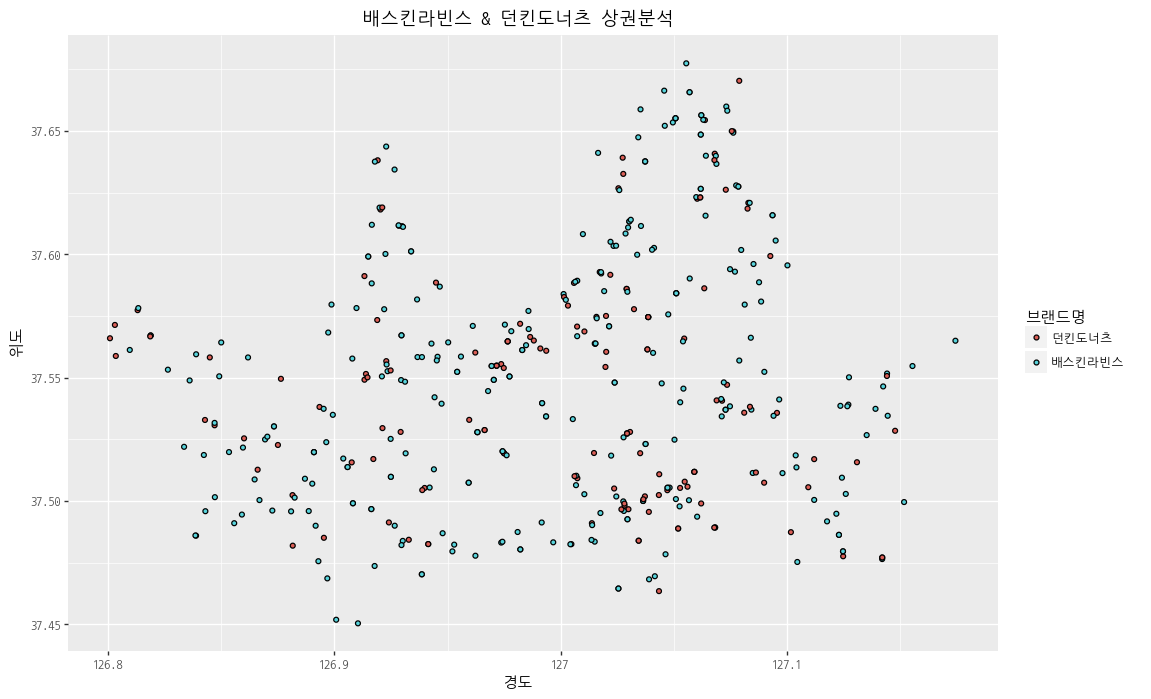

<ggplot: (-9223371889075511941)>

In [27]:
ggplot(df_31, aes(x = "경도", y = "위도", fill="브랜드명")) + geom_point() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (12, 8)) \
    + ggtitle("배스킨라빈스 & 던킨도너츠 상권분석")

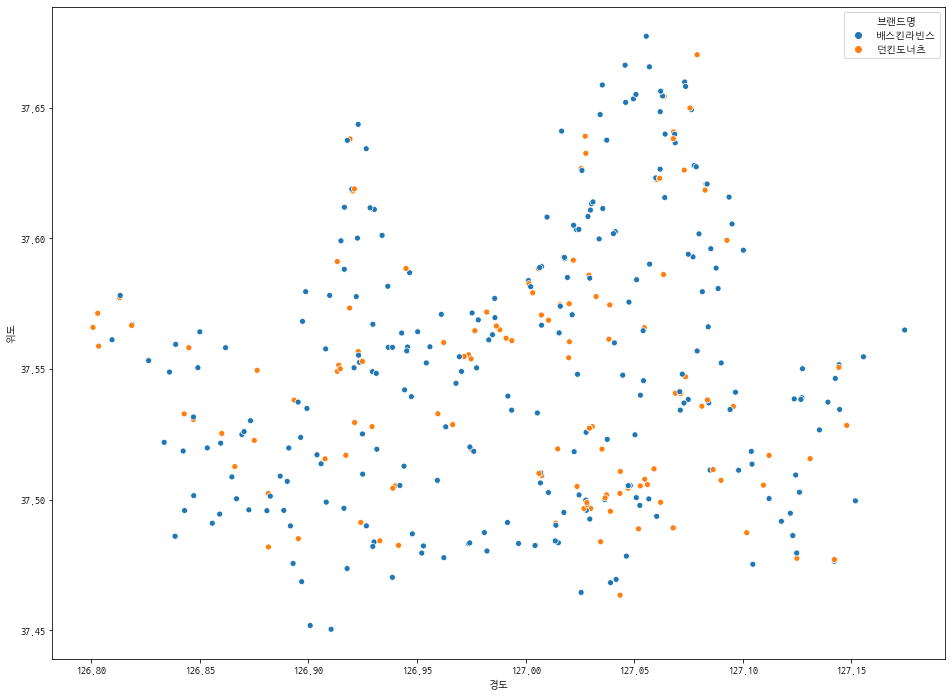

In [29]:
plt.figure(figsize = (16, 12))
sns.scatterplot(data = df_31, x = "경도", y = "위도", hue = "브랜드명")

In [30]:
import folium

In [42]:
baskin_dunkin_map = folium.Map(location = [df_31["위도"].mean(), df_31["경도"].mean()], zoom_start = 12)

for i in df_31.index:
    
    if df_31.loc[i, "브랜드명"] == "배스킨라빈스":
        icon_color = "pink"
    else:
        icon_color = "blue"
    
    folium.Marker(
        location = [df_31.loc[i, "위도"], df_31.loc[i, "경도"]],
        popup = df_31.loc[i, "브랜드명"],
        icon = folium.Icon(color = icon_color)
    ).add_to(baskin_dunkin_map)
    
baskin_dunkin_map.save("./data/baskin_dunkin_map.html")
baskin_dunkin_map

뚜레쥬르, 파리바게뜨 매장 입지 분석

In [53]:
# contains() 메소드의 regex 옵션은 정규 표현식 사용 여부를 지정한다. 생략시 True이고 정규식이 적용되며 False를
# 사용하면 정규식이 적용되지 않는다.
df_seoul[df_seoul["상호명"].str.contains("뚜레(쥬|주)르|파리(바게|크라)", regex = True)]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2358,20607348,뚜레쥬르,공릉점,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,1135010300107450000015284,동신아파트,서울특별시 노원구 공릉로 213,139728,1833.0,NaN,1,NaN,127.077295,37.628289
11488,20013560,파리바게뜨상계제일점,상계제일점,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,1135010500106700002000249,상계주공아파트9단지상가,서울특별시 노원구 노원로 540,139200,1676.0,NaN,1,NaN,127.059227,37.661367
11605,19996975,파리바게뜨길동사거리점,길동사거리점,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,1174010800103780000004616,웰빙메디컬빌딩,서울특별시 강동구 천호대로 1128,134030,5373.0,NaN,1,NaN,127.136501,37.534154
12141,20021253,파리바게뜨-판매옥수점,옥수점,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,1120011300102840002010250,NaN,서울특별시 성동구 독서당로 208,133839,4734.0,NaN,1,NaN,127.013966,37.543304
12416,20332682,파리바게뜨목동오거리점,목동오거리점,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,1147010100109910001002361,이화빌딩,서울특별시 양천구 오목로 218,158070,8022.0,NaN,1,NaN,126.861673,37.525553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486878,16096341,뚜레쥬르,씨제이프레시웨이강남세브란스점,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,1168011800101460092026388,강남세브란스병원,서울특별시 강남구 언주로 211,135720,6273.0,NaN,NaN,NaN,127.046294,37.492795
492569,16199721,파리바게뜨,정릉점,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,1129013300104140006034726,정릉2동새마을금고,서울특별시 성북구 보국문로 8,136845,2718.0,4,NaN,NaN,127.011641,37.605357
497546,16184184,파리바게뜨,반포제일,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,1165010700107280004018533,반포동다세대주택,서울특별시 서초구 주흥길 31-23,137809,6539.0,1,NaN,101,127.018728,37.506319
497972,16156505,파리바게뜨,마곡컨벤션점,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,1150010500107310245000001,서울마곡유치원,서울특별시 강서구 마곡서1로 139-13,157855,7598.0,NaN,NaN,NaN,126.818015,37.569257


In [57]:
df_pa = df_seoul[df_seoul["상호명"].str.contains("파스쿠", regex = True)]
df_pa["상호명"].value_counts()

파스쿠찌               50
카페파스쿠찌              2
파리크라상파스쿠찌서          2
파스쿠찌선릉이노센스점         1
파스쿠찌서울대병원점          1
파스쿠찌메세나폴리스점         1
파스쿠찌삼성역점            1
파스쿠찌서초효령로           1
남산트라펠리스파스쿠찌         1
파스쿠찌신촌연세대점          1
파스쿠찌홍제역점            1
파스쿠찌커피              1
파스쿠찌한강자이타워점         1
파스쿠찌대학로점            1
파리크라상파스쿠찌홍          1
파스쿠치여의도점아이리스        1
파스쿠찌화곡역점            1
파스쿠찌동대문APM점         1
파스쿠찌LG트윈타워점         1
파스쿠치커피숍             1
파스쿠찌종각알파빌딩점         1
파스쿠찌국악고점            1
파스쿠찌연세세브란스2호        1
파리크라상파스쿠찌압구정역2호     1
파스쿠찌카페              1
카페파스쿠치              1
파스쿠찌테크노마트점          1
Name: 상호명, dtype: int64

In [58]:
df_jam = df_seoul[df_seoul["상호명"].str.contains("잠바", regex = True)]
df_jam["상호명"].value_counts()

잠바주스             4
잠바주스합정메세나폴리스점    1
잠바주스디큐브시티점       1
잠바주스청량리역사점       1
잠바주스한남더힐         1
파리크라상잠바주스동       1
잠바주스용산미군기지점      1
파리크라상잠바주스디큐브     1
잠바주스김포스카이파크점     1
Name: 상호명, dtype: int64

In [ ]:
# 파스쿠치와 잠바주스의 상호명에 파리크라상이 들어간 경우가 있기 때문에 파스쿠치와 잠바주스는 제외한다.

In [63]:
df_bread = df_seoul.loc[
    df_seoul["상호명"].str.contains("뚜레(쥬|주)르|파리(바게|크라)", regex = True) & 
    ~df_seoul["상호명"].str.contains("파스쿠|잠바", regex = True)
]
df_bread["상호명"].value_counts()

파리바게뜨            211
뚜레쥬르             133
파리크라상             12
씨제이뚜레쥬르            2
파리바게뜨카페대학로점        2
                ... 
파리바게뜨카페당산동행복점      1
뚜레쥬르신길삼거리          1
파리바게뜨강동경희          1
파리바게뜨카페하월곡동일점      1
뚜레쥬르엔시티보라매         1
Name: 상호명, Length: 295, dtype: int64

In [67]:
df_bread.loc[df_bread["상호명"].str.contains("파리(바게|크라)"), "브랜드명"] = "파리바게뜨"
df_bread.loc[df_bread["상호명"].str.contains("뚜레(쥬|주)르"), "브랜드명"] = "뚜레쥬르"
df_bread["브랜드명"].value_counts()

파리바게뜨    446
뚜레쥬르     206
Name: 브랜드명, dtype: int64

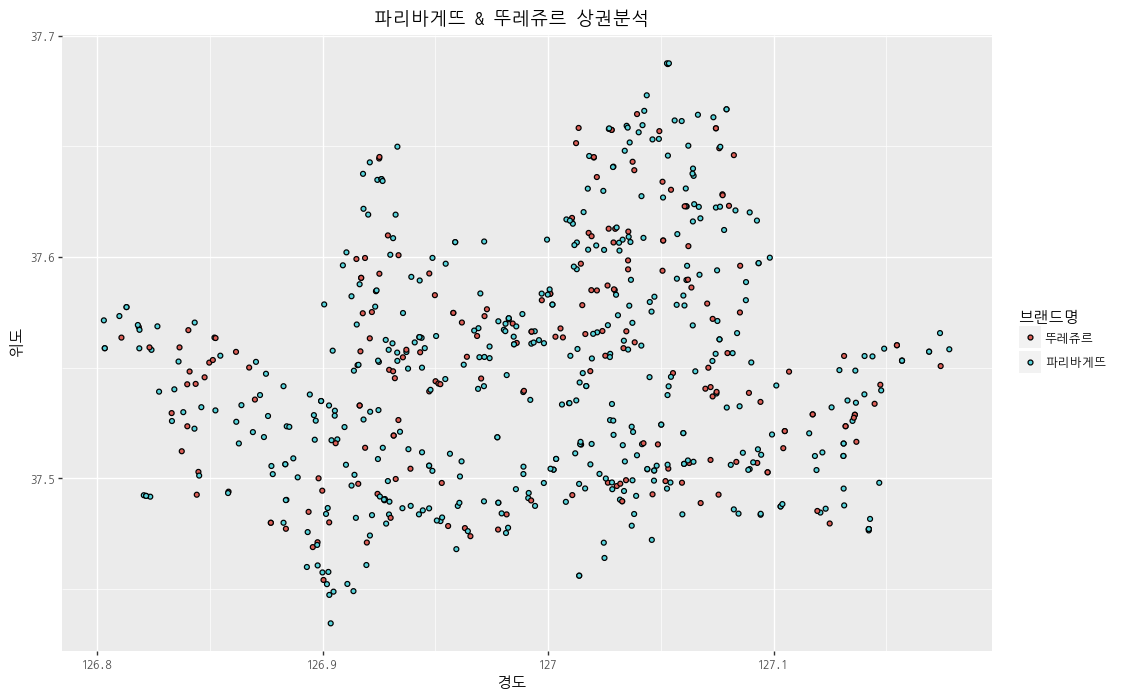

<ggplot: (147792595983)>

In [68]:
ggplot(df_bread, aes(x = "경도", y = "위도", fill="브랜드명")) + geom_point() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (12, 8)) \
    + ggtitle("파리바게뜨 & 뚜레쥬르 상권분석")

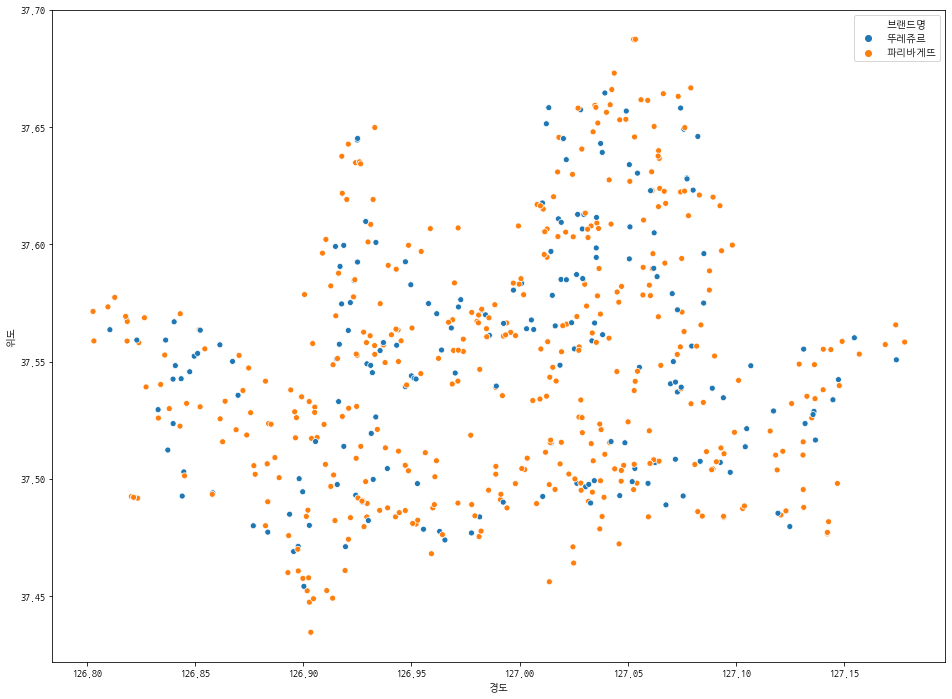

In [69]:
plt.figure(figsize = (16, 12))
sns.scatterplot(data = df_bread, x = "경도", y = "위도", hue = "브랜드명")

In [71]:
bread_map = folium.Map(location = [df_bread["위도"].mean(), df_bread["경도"].mean()], zoom_start = 12)

for i in df_bread.index:
    
    if df_bread.loc[i, "브랜드명"] == "파리바게뜨":
        icon_color = "pink"
    else:
        icon_color = "blue"
    
    folium.Marker(
        location = [df_bread.loc[i, "위도"], df_bread.loc[i, "경도"]],
        popup = df_bread.loc[i, "브랜드명"],
        icon = folium.Icon(color = icon_color)
    ).add_to(bread_map)
    
bread_map.save("./data/bread_map.html")
bread_map

In [73]:
df_seoul[df_seoul["상호명"].str.contains("스타벅스|starbucks|STARBUCKS", regex = True)]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1619,19998811,스타벅스종로3가점,종로3가점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111015600100090003016323,NaN,서울특별시 종로구 종로 113-1,110123,3139.0,NaN,1,NaN,126.990207,37.570585
12478,20283351,스타벅스커피여의도IFC1F,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,3,NaN,126.924863,37.525172
12489,20288646,스타벅스,삼성역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010500101680026016641,제일빌딩,서울특별시 강남구 테헤란로103길 9,135090,6173.0,NaN,1,NaN,127.063878,37.510038
13539,20597950,스타벅스,신림포도몰점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1162010200116410002000002,포도몰,서울특별시 관악구 신림로 330,151930,8777.0,NaN,1,NaN,126.930216,37.483845
13760,20825451,스타벅스신림사거리점,신림사거리점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1162010200114220037013287,영일빌딩,서울특별시 관악구 남부순환로 1619,151890,8754.0,NaN,2,NaN,126.930487,37.484631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495517,16185923,스타벅스,착한빵,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114016200103720096007239,NaN,서울특별시 중구 동호로7길 31,100840,4596.0,NaN,1,105,127.010881,37.552352
495828,16161978,스타벅스,용산역써밋R점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1117012500103910000013692,용산푸르지오써밋,서울특별시 용산구 한강대로 69,140876,4378.0,NaN,2,215,126.965220,37.527452
497862,16184113,스타벅스,미스리,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111014200100340002026344,NaN,서울특별시 종로구 북촌로5가길 27,110230,3053.0,NaN,2,NaN,126.981659,37.580648
498901,16113431,스타벅스,송파개롱역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1171010700101740015005915,한라산업개발빌딩,서울특별시 송파구 오금로 420,138811,5769.0,NaN,NaN,NaN,127.136262,37.496983


In [74]:
df_seoul[df_seoul["상호명"].str.contains("이디야|ediya|EDIYA", regex = True)]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1402,25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156013200100590002019075,엔씨티오피스텔,서울특별시 영등포구 영등포로 353,150050,7318.0,NaN,1,NaN,126.918062,37.515118
2433,20592419,이디야커피,이마트구로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1153010200101880026022963,이마트구로점,서울특별시 구로구 디지털로32길 43,152050,8379.0,NaN,3,NaN,126.897870,37.484385
7379,23258426,이디야커피,중계롯데우성점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1135010600103610001010666,우성아파트,서울특별시 노원구 노원로22길 34,139918,1746.0,NaN,2,NaN,127.072754,37.646364
12312,20022357,이디야커피,금호역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1120011100113870009013811,NaN,서울특별시 성동구 장터길 17-1,133807,4724.0,NaN,1,2,127.017791,37.548427
12605,20264296,이디야커피,창신점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111017400103730000005465,NaN,서울특별시 종로구 종로 316-1,110540,3121.0,NaN,1,NaN,127.012908,37.572020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476208,16169240,이디야커피,석계역사점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1135010200100250002000001,석계역6호선,서울특별시 노원구 화랑로 347-1,139051,1914.0,NaN,NaN,NaN,127.066098,37.615037
477092,16251644,이디야카페,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111013800100110001015931,NaN,서울특별시 종로구 종로 75,110122,3164.0,NaN,1,NaN,126.985761,37.570421
484780,16195232,이디야커피,에스프레소,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100108150009028043,점프밀라노,서울특별시 강남구 강남대로 432,135931,6129.0,NaN,5,518,127.026609,37.501231
488161,16109492,이디야커피,세이브존노원점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1135010400102840000013049,한신청구아파트,서울특별시 노원구 공릉로 351,139937,1784.0,NaN,-1,NaN,127.068018,37.638154


In [76]:
df_cafe = df_seoul[df_seoul["상호명"].str.contains("스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA", 
                                                regex = True)]
df_cafe

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1402,25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156013200100590002019075,엔씨티오피스텔,서울특별시 영등포구 영등포로 353,150050,7318.0,NaN,1,NaN,126.918062,37.515118
1619,19998811,스타벅스종로3가점,종로3가점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111015600100090003016323,NaN,서울특별시 종로구 종로 113-1,110123,3139.0,NaN,1,NaN,126.990207,37.570585
2433,20592419,이디야커피,이마트구로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1153010200101880026022963,이마트구로점,서울특별시 구로구 디지털로32길 43,152050,8379.0,NaN,3,NaN,126.897870,37.484385
7379,23258426,이디야커피,중계롯데우성점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1135010600103610001010666,우성아파트,서울특별시 노원구 노원로22길 34,139918,1746.0,NaN,2,NaN,127.072754,37.646364
12312,20022357,이디야커피,금호역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1120011100113870009013811,NaN,서울특별시 성동구 장터길 17-1,133807,4724.0,NaN,1,2,127.017791,37.548427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495517,16185923,스타벅스,착한빵,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114016200103720096007239,NaN,서울특별시 중구 동호로7길 31,100840,4596.0,NaN,1,105,127.010881,37.552352
495828,16161978,스타벅스,용산역써밋R점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1117012500103910000013692,용산푸르지오써밋,서울특별시 용산구 한강대로 69,140876,4378.0,NaN,2,215,126.965220,37.527452
497862,16184113,스타벅스,미스리,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111014200100340002026344,NaN,서울특별시 종로구 북촌로5가길 27,110230,3053.0,NaN,2,NaN,126.981659,37.580648
498901,16113431,스타벅스,송파개롱역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1171010700101740015005915,한라산업개발빌딩,서울특별시 송파구 오금로 420,138811,5769.0,NaN,NaN,NaN,127.136262,37.496983


In [78]:
df_cafe.loc[df_cafe["상호명"].str.contains("스타벅스|starbucks|STARBUCKS"), "브랜드명"] = "스타벅스"
df_cafe.loc[df_cafe["상호명"].str.contains("이디야|ediya|EDIYA"), "브랜드명"] = "이디야"
df_cafe["브랜드명"].value_counts()

스타벅스    472
이디야     465
Name: 브랜드명, dtype: int64

In [79]:
cafe_map = folium.Map(location = [df_cafe["위도"].mean(), df_cafe["경도"].mean()], zoom_start = 12)

for i in df_cafe.index:
    
    if df_cafe.loc[i, "브랜드명"] == "스타벅스":
        icon_color = "green"
    else:
        icon_color = "blue"
    
    folium.Marker(
        location = [df_cafe.loc[i, "위도"], df_cafe.loc[i, "경도"]],
        popup = df_cafe.loc[i, "브랜드명"],
        icon = folium.Icon(color = icon_color)
    ).add_to(cafe_map)
    
cafe_map.save("./data/cafe_map.html")
cafe_map